# Imports

In [49]:
import os
import numpy as np
import skimage.io as io
from skimage.io import imshow,imread, imsave

# Ex 3.2.1
import skimage.exposure as exposure
# Ex 3.2.2
from skimage.exposure import equalize_hist
from skimage.exposure import equalize_adapthist
# Ex. 3.2.3
from skimage.filters import rank # rank.mean function to calculate neighbourhood
from skimage.morphology import square # to give the neighbourhood for the averaging
from skimage.filters import unsharp_mask

# multiple figures
import matplotlib.pyplot as plt

In [5]:
os.getcwd()
os.chdir("PycharmProjects/bioimaging_ws2223/")
os.getcwd()

'/home/vfs/PycharmProjects/bioimaging_ws2223'

# Intensity transformation
## Image negative

Load the image Gonzalez2009-Fig3.4.tif (Gonzalez and Woods, 2009, Figure 3.4), get its
negative (invert intensity values) and save it to a png file.

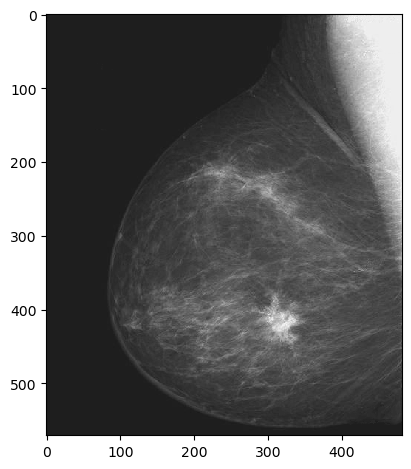

In [7]:
im1 = io.imread('Data/Gonzalez2009-Fig3.4.tif')
io.imshow(im1) # you have to call io.imshow as we imported skimage.io as io

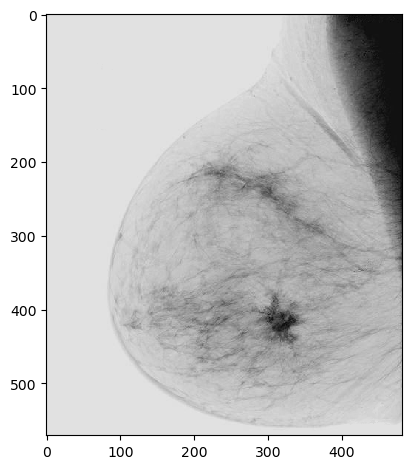

In [8]:
# make it negative
im1neg = 255 - im1 # L - 1 - input
io.imshow(im1neg)

## Log transformation
Load the image Gonzalez2009-Fig3.5.tif (Gonzalez and Woods, 2009, Figure 3.5), apply a
log-transformation as described in the lecture and visualize both the original image and
the transformed image one after another.

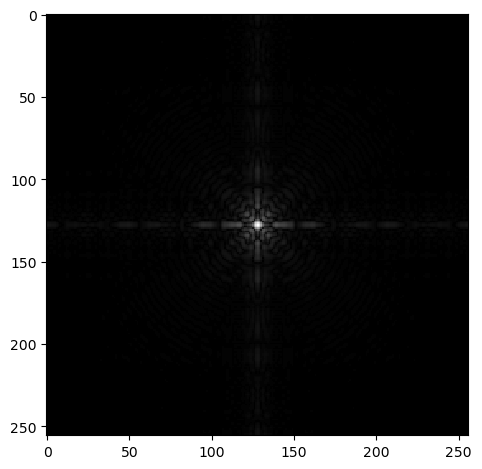

In [9]:
im2 = io.imread('Data/Gonzalez2009-Fig3.5.tif')
io.imshow(im2)

/home/vfs/anaconda3/envs/bioimaging/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


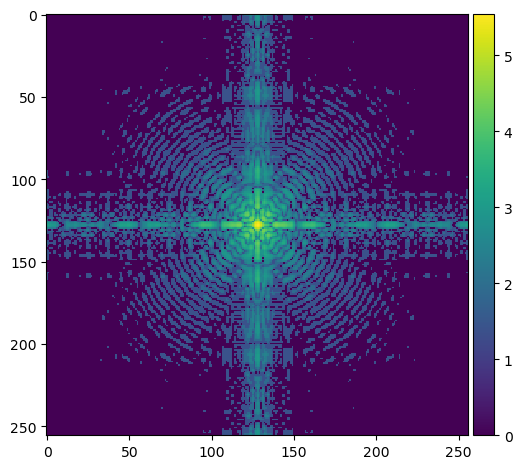

In [10]:
im2log = np.log(im2+1.0)
imshow(im2log) # range outside 0 to 1, will show a heatmap

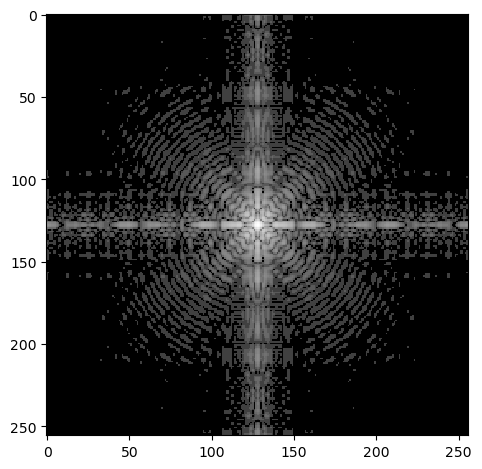

In [11]:
im2log = im2log / im2log.max() # divide by maximum value to get something bitween 0 and 1
imshow(im2log) # will show a grayscale image now

other way using skimage

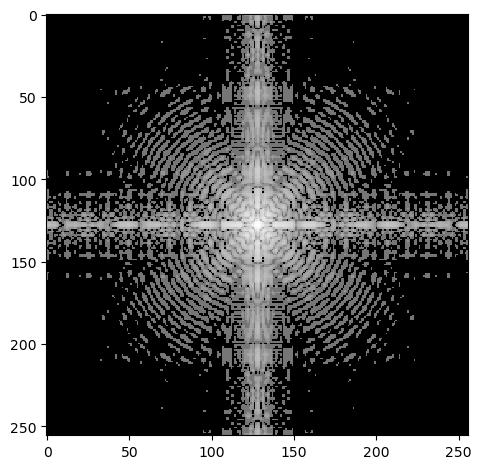

In [13]:
im2log = exposure.adjust_log(np.log(im2+1.0))
im2log = im2log / im2log.max()
imshow(im2log)

Q: What does the log transformation do here?

A: Widens the spectrum of values? Through this shadows and finer gradients become visible?

## Gamma correction
Load the image Mimulus-CRW5320.jpg and apply gamma corrections with **gamma values**
above and below 1. Visualize and comment your output images.

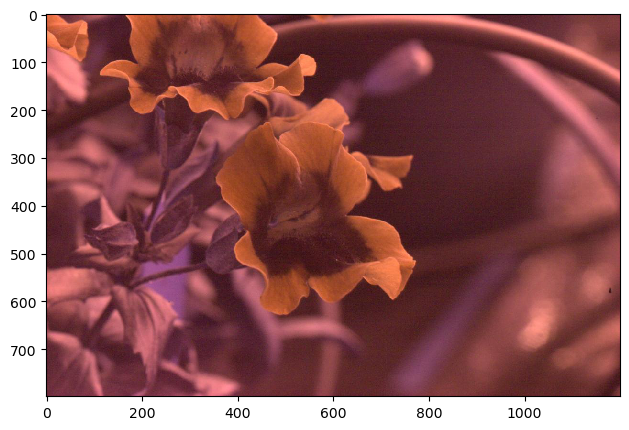

In [14]:
im3 = io.imread('Data/Mimulus-CRW5320.jpg')
imshow(im3)

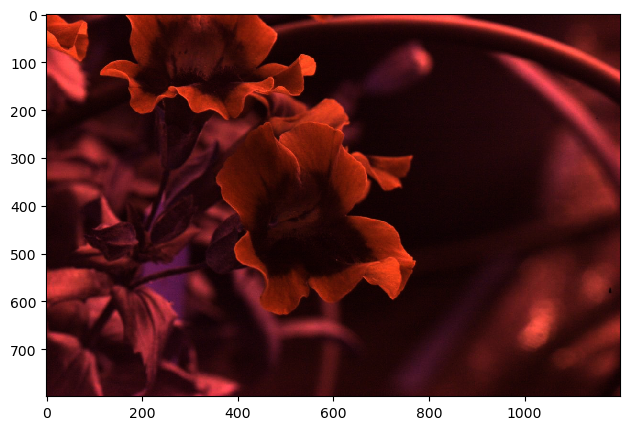

In [15]:
im3gamma2 = im3 ** 2.0 # will put all entries to the power of two
im3gamma2 = im3gamma2 / im3gamma2.max() # put into 0 to 1 range
imshow(im3gamma2)

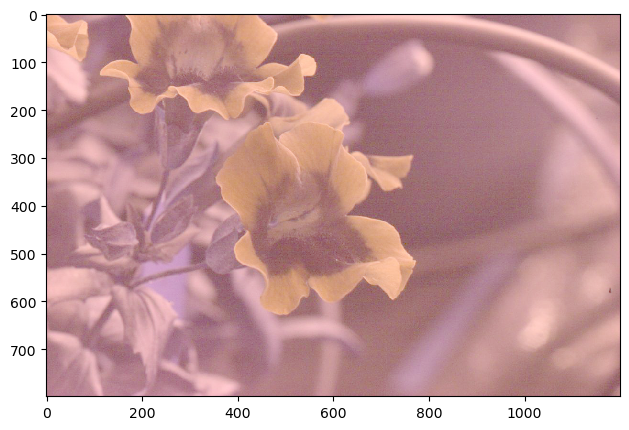

In [16]:
im3gamma0_4 = im3 ** 0.4
im3gamma0_4 = im3gamma0_4 / im3gamma0_4.max()
imshow(im3gamma0_4)

Q: Visualize and comment your output images.

A: The gamma values seems to tweak some red value - but not the one of the colors but a value that seems to lie on top of everything. And the adjusting kind of regulates the intensity of that value. I don't now anyhting about it --> have to check out the lecture again

In [ ]:
# sklearn version

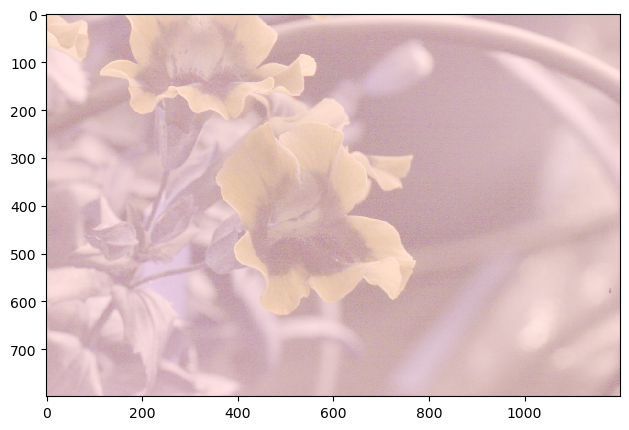

In [17]:
im3_gamma_0_2 = exposure.adjust_gamma(im3,0.2)
imshow(im3_gamma_0_2)

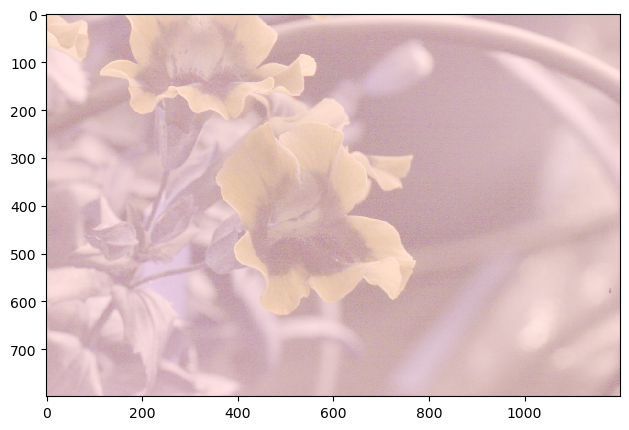

In [18]:
im3_gamma_0_4 = exposure.adjust_gamma(im3,0.4)
imshow(im3_gamma_0_2)

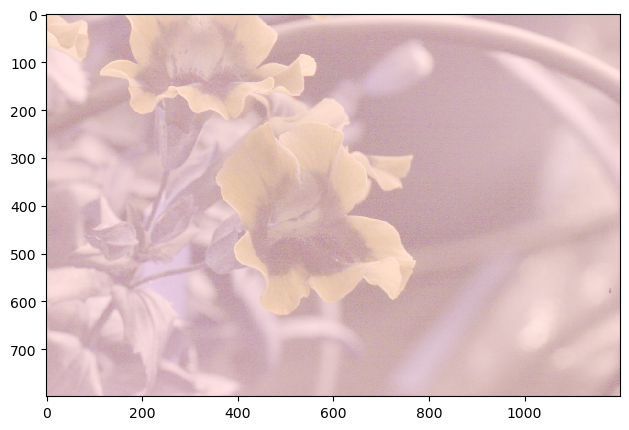

In [19]:
im3_gamma_1_5 = exposure.adjust_gamma(im3,1.5)
imshow(im3_gamma_0_2)

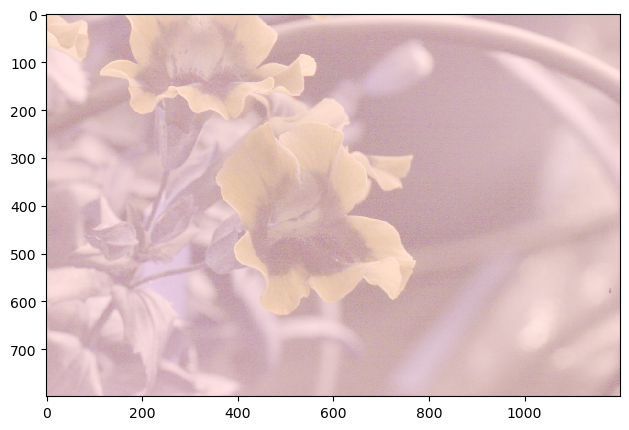

In [20]:
im3_gamma_2_0 = exposure.adjust_gamma(im3,2.0)
imshow(im3_gamma_0_2)

# Histogram equalization
## Global histogram equalization
Function used: [plot_equalize](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html)

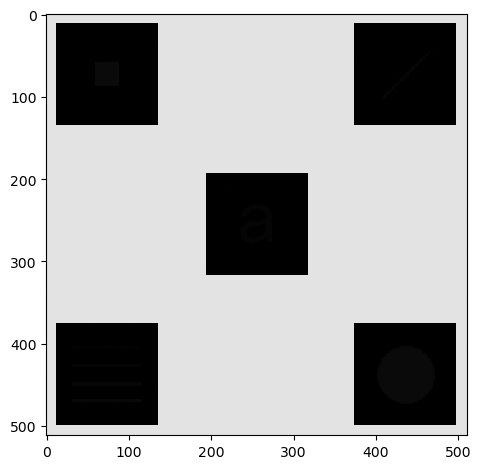

In [21]:
im = imread('Data/Gonzalez2009-Fig3.26.tif')
imshow(im)

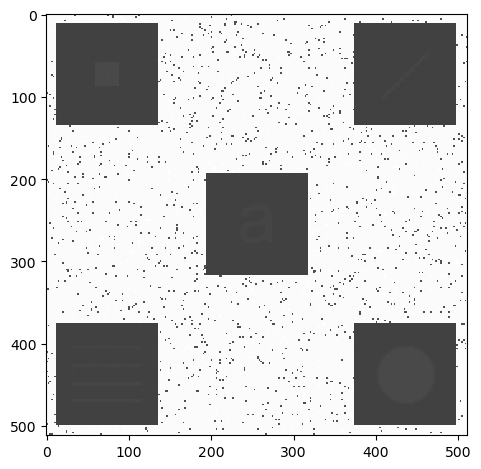

In [24]:
im_eq = equalize_hist(im)
imshow(im_eq)

## Adaptive Equalization

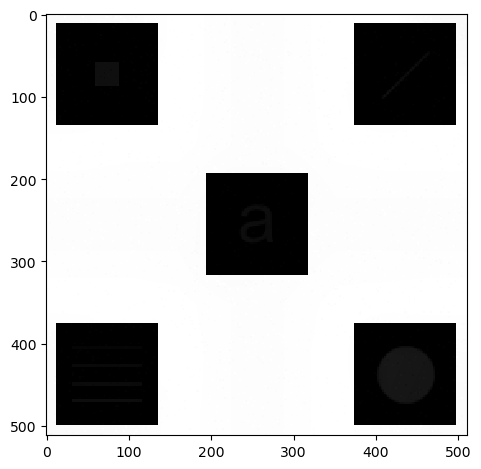

In [27]:
im_adapteq = equalize_adapthist(im)
imshow(im_adapteq)

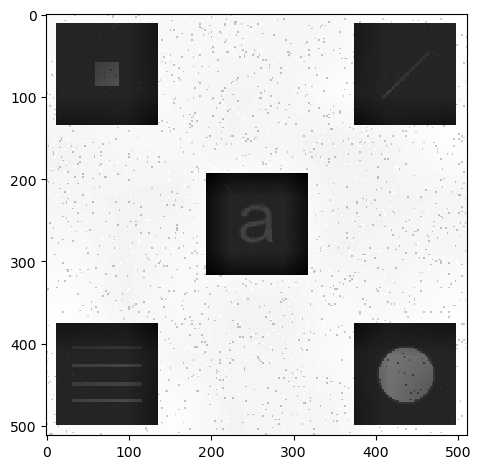

In [28]:
im_adapteq = equalize_adapthist(im, clip_limit=0.2) # increased clip_limit parameter gives more contrast
imshow(im_adapteq)

## Local histogram equalization giving neighbourhood for each pixel

In [29]:
from skimage.filters.rank import equalize
from skimage.morphology import disk,square # function to define neighbourhood

/tmp/ipykernel_46550/4071114466.py:1: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  im_hist_local = equalize(im, selem=square(100))


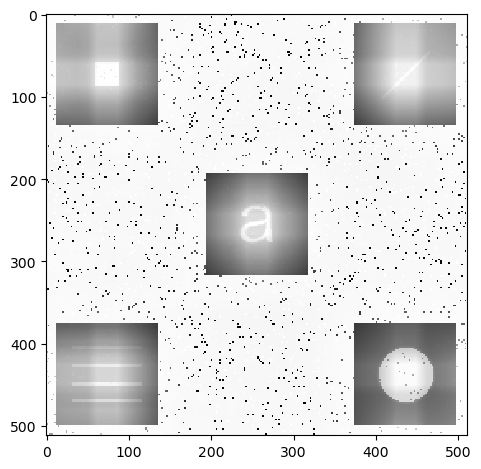

In [30]:
im_hist_local = equalize(im, selem=square(100))
imshow(im_hist_local)

/tmp/ipykernel_46550/2715652452.py:1: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  im_hist_local = equalize(im, selem=disk(30))


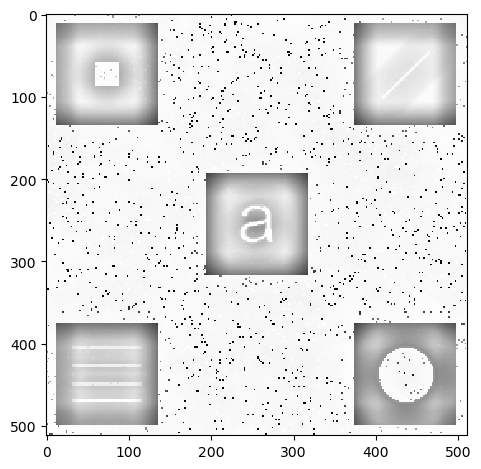

In [31]:
im_hist_local = equalize(im, selem=disk(30))
imshow(im_hist_local)

## Spatial transformation

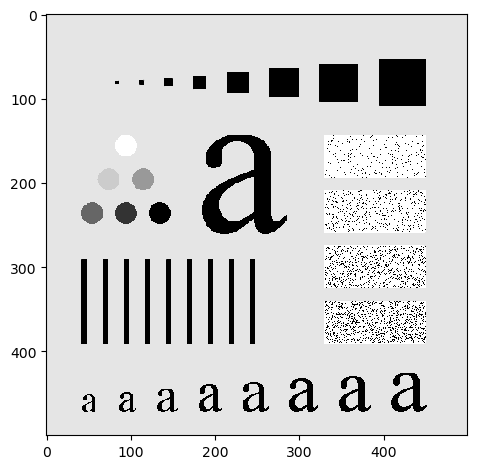

In [33]:
im33 = imread('Data/Gonzalez2009-Fig3.33.tif')
imshow(im33)

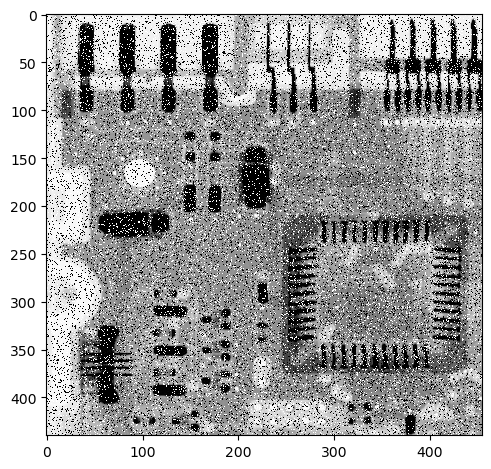

In [34]:
im35 = imread('Data/Gonzalez2009-Fig3.35.tif')
imshow(im35)

## Average and median filter

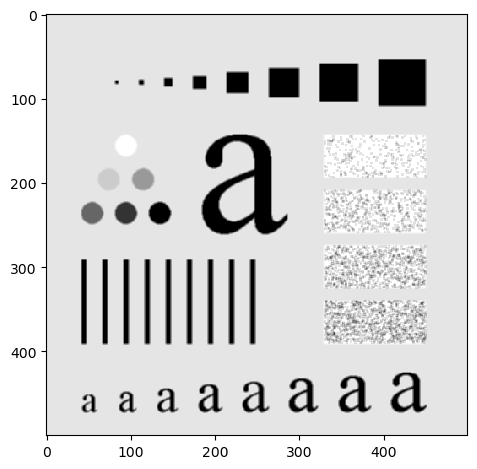

In [37]:
savedir = "Images/"

im33_mean = rank.mean(im33, square(3))
io.imshow(im33_mean)
imsave(os.path.join(savedir,'Gonzalez2009-Fig3.33_mean3.tif'), im33_mean)

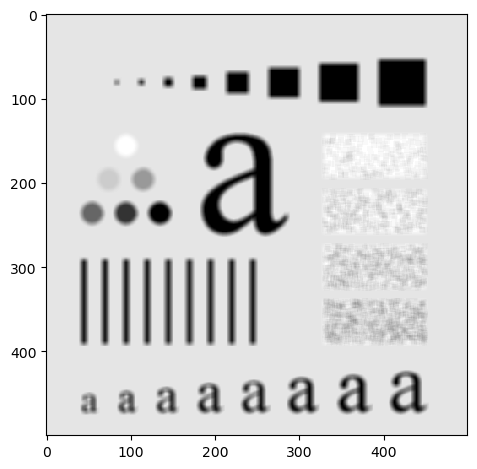

In [38]:
im33_mean = rank.mean(im33, square(7))
io.imshow(im33_mean)
imsave(os.path.join(savedir,'Gonzalez2009-Fig3.33_mean7.tif'), im33_mean)

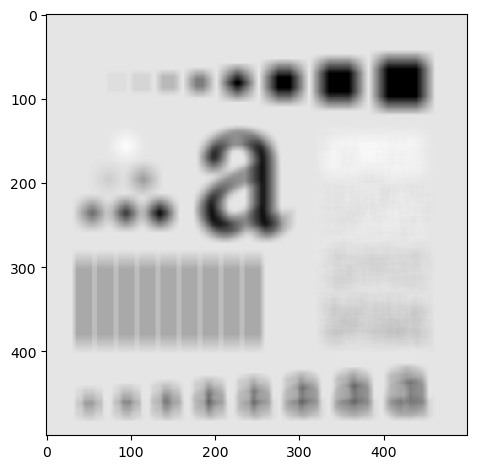

In [39]:
im33_mean = rank.mean(im33, square(23))
io.imshow(im33_mean)
imsave(os.path.join(savedir,'Gonzalez2009-Fig3.33_mean23.tif'), im33_mean)

In [68]:
## Average and median filter for three neigbourhoods in a loop in a loop
for i in [3,7,23]:
    io.imsave('Images/Gonzalez2009-Fig3.33_mean'+str(i)+'.tif', rank.mean(im33, square(i)))
    io.imsave('Images/Gonzalez2009-Fig3.35_mean'+str(i)+'.tif', rank.mean(im35, square(i)))
    io.imsave('Images/Gonzalez2009-Fig3.33_median'+str(i)+'.tif', rank.median(im33, square(i)))
    io.imsave('Images/Gonzalez2009-Fig3.35_median'+str(i)+'.tif', rank.median(im35, square(i)))

## Sharpen image using unsharp masking

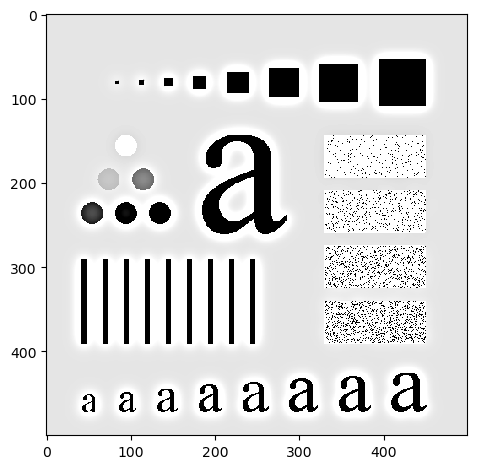

In [43]:
## Using skimage.filters.unsharp_mask
im33_um2 = unsharp_mask(im33, radius=7.0)
imshow(im33_um2)

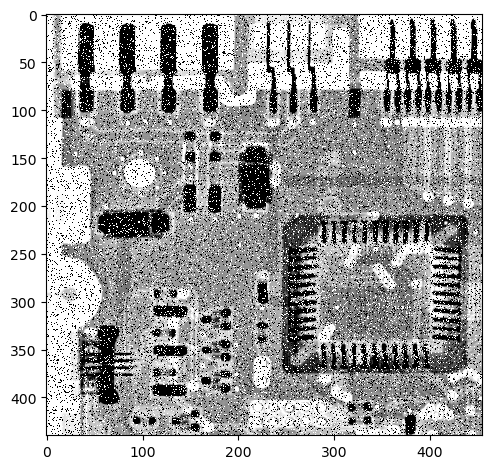

In [47]:
im35_um2 = unsharp_mask(im35, radius=10.0)
imshow(im35_um2)

## Revert
Can you revert the smoothed images bach to their initial state?

TODO

## Plot multiple images in one figure

Text(0.5, 1.0, 'radius = 13.0')

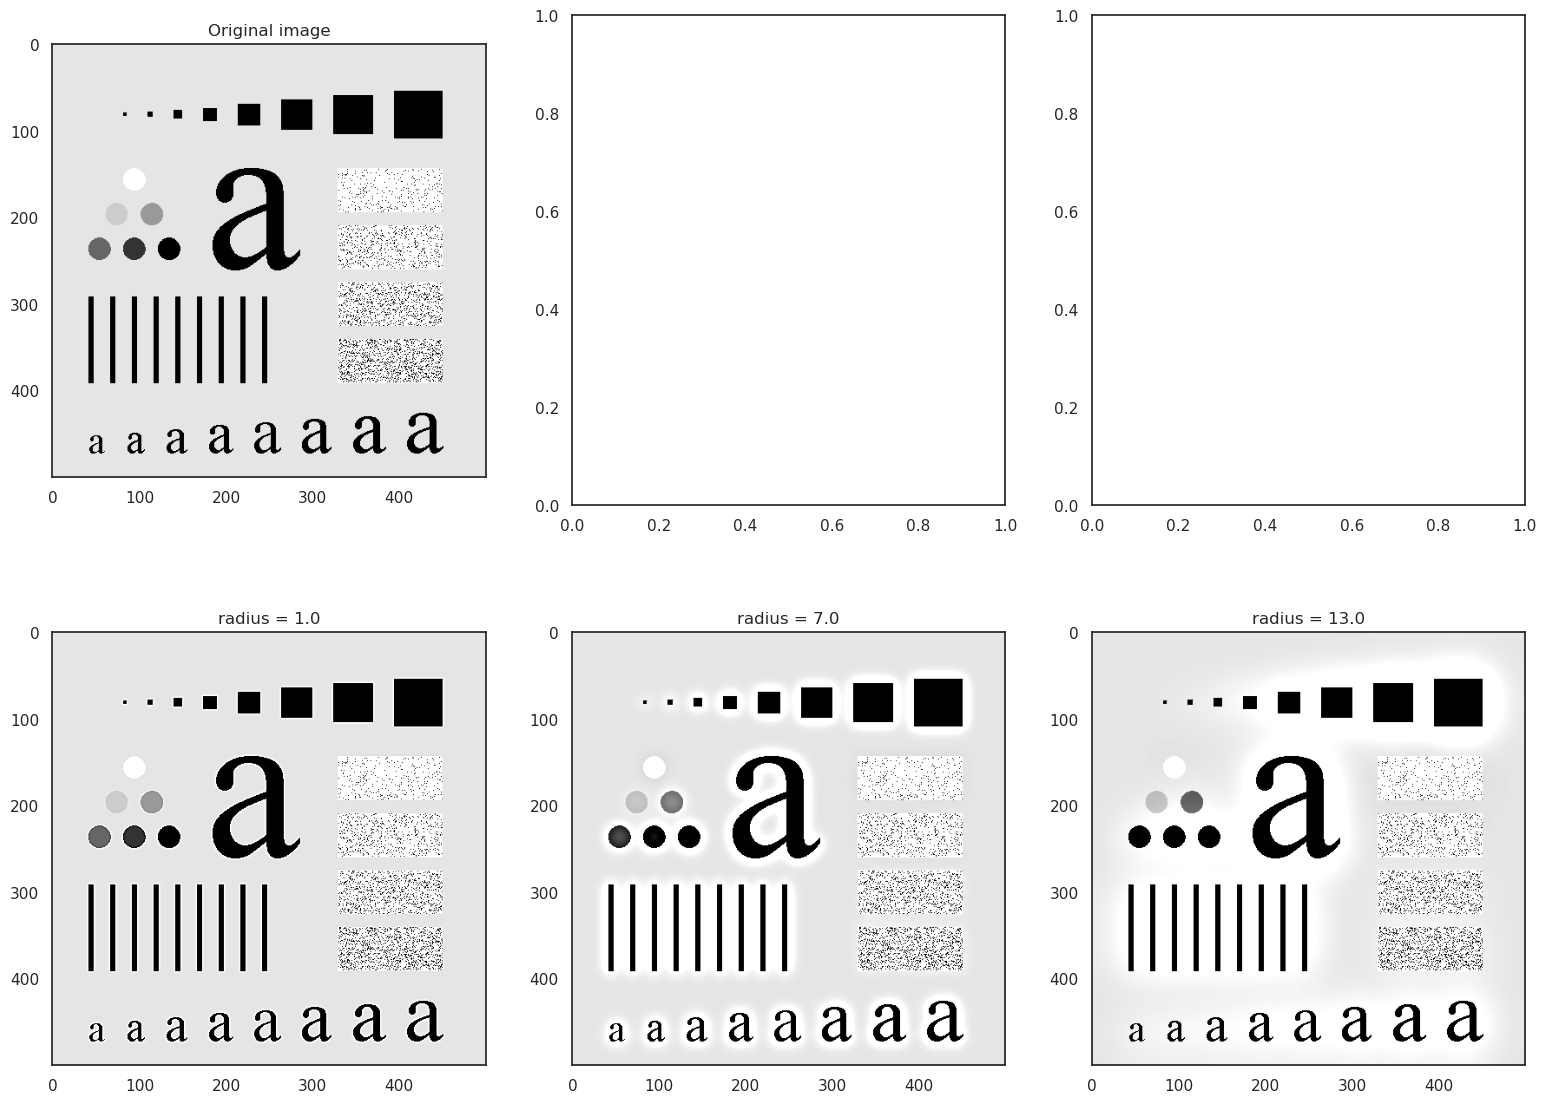

In [56]:
fig4, plots4 = plt.subplots(nrows=2,
                            ncols=3,
                            figsize=(19,14))
plots4[0,0].imshow(im33, cmap=plt.cm.gray)
plots4[0,0].set_title("Original image")

plots4[1,0].imshow(unsharp_mask(im33, radius=1.0),
                   cmap=plt.cm.gray)
plots4[1,0].set_title('radius = 1.0')
plots4[1,1].imshow(unsharp_mask(im33, radius=7.0), cmap=plt.cm.gray)
plots4[1,1].set_title('radius = 7.0')
plots4[1,2].imshow(unsharp_mask(im33, radius=23.0), cmap=plt.cm.gray)
plots4[1,2].set_title('radius = 13.0')

# with seaborn it's probably easier - I think its more ggplot/cowplot like there to do multiplots

hard to judge the differences

do a image [diff comparison](https://scikit-image.org/docs/stable/auto_examples/applications/plot_image_comparison.html)

In [57]:
from matplotlib.gridspec import GridSpec
from skimage import data, transform, exposure
from skimage.util import compare_images

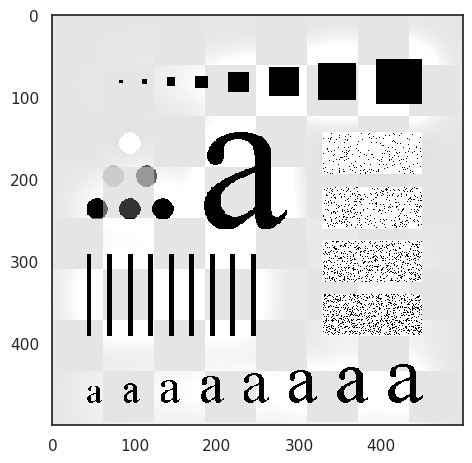

In [63]:
img33_sharped = unsharp_mask(im33, radius=23.0)

comp_equalized = compare_images(im33, img33_sharped, method='checkerboard')
io.imshow(comp_equalized)

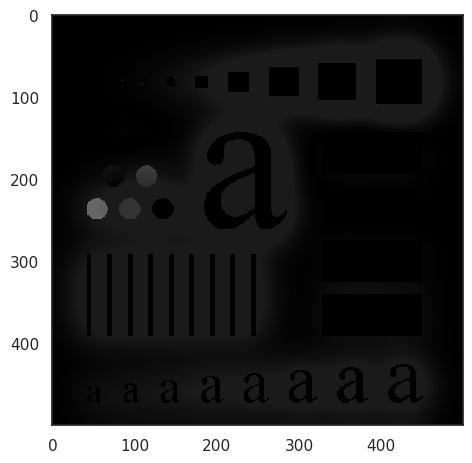

In [64]:
diff_rotated = compare_images(im33, img33_sharped, method='diff')
io.imshow(diff_rotated)

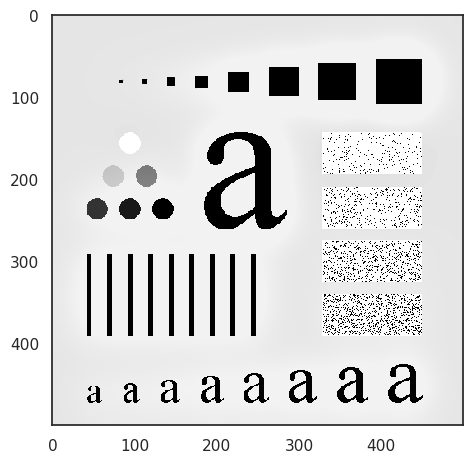

In [65]:
blend_rotated = compare_images(im33, img33_sharped, method='blend')
io.imshow(blend_rotated)

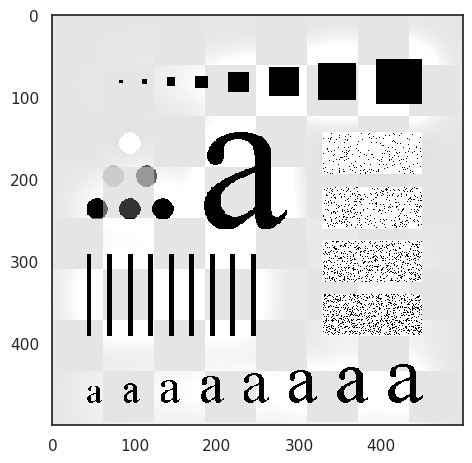

In [62]:
io.imshow(comp_equalized)

In [72]:
io.imsave('Images/sharpen_orig.png', im33)
io.imsave('Images/sharpen_23.png', img33_sharped)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


For easy image comparison use the [diffchecker](https://www.diffchecker.com/image-compare/)